# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("zillow_data.csv")

In [8]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [9]:
df.iloc[:,160:172]

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12
0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0
1,202400.0,201700.0,201200.0,200700.0,200000.0,199700.0,199700.0,199900.0,200100.0,200200.0,200200.0,200100.0
2,246700.0,246100.0,245800.0,245900.0,246200.0,246800.0,247200.0,247600.0,247900.0,248000.0,248000.0,249000.0
3,1065400.0,1057800.0,1048900.0,1037900.0,1024300.0,1010200.0,999000.0,990900.0,985400.0,983200.0,982400.0,982400.0
4,121600.0,121200.0,120700.0,120300.0,119700.0,119100.0,118700.0,118400.0,118200.0,117900.0,117600.0,117400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14718,190700.0,190500.0,189800.0,188700.0,187500.0,186700.0,186600.0,187100.0,187300.0,187500.0,187700.0,188200.0
14719,207900.0,205400.0,202800.0,200900.0,199200.0,197300.0,196400.0,196400.0,196900.0,197600.0,197900.0,198200.0
14720,107600.0,107800.0,108100.0,108200.0,108300.0,108400.0,108400.0,108200.0,107900.0,107600.0,107000.0,106500.0
14721,645000.0,646100.0,646100.0,646800.0,647400.0,647300.0,643100.0,634700.0,625400.0,616900.0,608200.0,602600.0


In [10]:
df['ROI'] = ((df.iloc[:,260:272].mean(axis=1))/(df.iloc[:,160:172].mean(axis=1))-1)*100

In [11]:
df = df.sort_values(['ROI'], ascending=[False])
df[:10]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1506100,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700,186.643707
1155,62033,11222,New York,NY,New York,Kings,1156,149200.0,148400.0,147500.0,...,1623800,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100,168.108651
5738,97691,94301,Palo Alto,CA,San Jose,Santa Clara,5739,709500.0,711900.0,715000.0,...,4247600,4319300,4401100,4481700,4544700,4595100,4668700,4762600,4818400,167.705936
2470,93200,80010,Aurora,CO,Denver,Arapahoe,2471,70400.0,70800.0,71400.0,...,254000,255700,257700,260600,264000,266500,269500,274100,277600,153.030548
2452,83850,58801,Williston,ND,Williston,Williams,2453,NaN,NaN,NaN,...,231800,233400,233100,231600,229500,228100,227500,226800,226000,148.136450
2054,97693,94303,Palo Alto,CA,San Jose,Santa Clara,2055,374300.0,375900.0,377600.0,...,2456800,2522600,2598400,2647600,2657900,2659800,2683900,2718600,2733900,146.739200
2580,97530,94043,Mountain View,CA,San Jose,Santa Clara,2581,291700.0,294000.0,296400.0,...,1745300,1779800,1812000,1847800,1881900,1915700,1965600,2031800,2074900,146.004988
1791,97527,94040,Mountain View,CA,San Jose,Santa Clara,1792,413200.0,416100.0,419200.0,...,2418700,2478700,2541700,2609400,2669000,2718200,2770500,2820300,2839500,142.983223
2155,93281,80204,Denver,CO,Denver,Denver,2156,72700.0,73200.0,73800.0,...,335300,339500,344100,348300,353000,356800,360800,366600,371600,142.856310
9453,98441,95832,Sacramento,CA,Sacramento,Sacramento,9454,71700.0,71400.0,71200.0,...,244000,245500,245700,245300,246400,248500,249700,249700,248900,142.491144


In [12]:
df['std']=df.loc[:,'2009-01':'2018-04'].std(skipna=True, axis=1)
#Calculate historical mean value
df['mean']=df.loc[:,'2009-01':'2018-04'].mean(skipna=True, axis=1)
#Calculate coefficient of variance
df['CV']=df['std']/df['mean']
#Define upper limit of CV according to risk profile.
upper_cv = df.CV.quantile(.6)
best_ROI = df[df['CV']<upper_cv].sort_values('ROI',axis=0,ascending=False)[:10]
best_ROI

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV
14196,65608,18832,Monroe,PA,Sayre,Bradford,14197,65400.0,65700.0,66000.0,...,124200,124200,124600,124800,124000,123000,44.415205,10525.085558,106157.142857,0.099146
5221,80934,52317,North Liberty,IA,Iowa City,Johnson,5222,NaN,NaN,NaN,...,194800,196200,197500,198600,199800,201000,41.439654,17001.332751,169375.000000,0.100377
13418,64804,16914,Springfield,PA,Sayre,Bradford,13419,69400.0,69800.0,70100.0,...,123800,123700,124600,126400,127200,127200,40.764453,9814.787880,105019.642857,0.093457
6646,91249,76104,Fort Worth,TX,Dallas-Fort Worth,Tarrant,6647,35500.0,35600.0,35700.0,...,76000,76000,76200,77500,80200,81800,40.163934,6318.786658,60527.678571,0.104395
11991,75107,39041,Bolton,MS,Jackson,Hinds,11992,NaN,NaN,NaN,...,128600,130100,131400,130400,126600,123000,39.379145,11283.378590,107884.821429,0.104587
4931,63903,15106,Carnegie,PA,Pittsburgh,Allegheny,4932,69900.0,70100.0,70300.0,...,133800,134600,135600,136600,137500,137700,38.703784,11427.000696,107792.857143,0.106009
12765,91510,76638,Crawford,TX,Waco,McLennan,12766,126500.0,126700.0,127000.0,...,234300,234900,238000,241400,245500,248800,38.103835,19086.593784,192075.892857,0.099370
10686,63434,14131,Ransomville,NY,Buffalo,Niagara,10687,86200.0,85800.0,85400.0,...,159500,160800,162400,164300,165800,166500,37.939845,13077.550591,129503.571429,0.100982
13254,82516,55955,Mantorville,MN,Rochester,Dodge,13255,95400.0,96200.0,97000.0,...,299200,298800,298600,298200,297900,297700,37.768441,25141.544221,240257.142857,0.104644
4254,77016,44116,Rocky River,OH,Cleveland,Cuyahoga,4255,165600.0,165700.0,165800.0,...,259200,260900,263100,265800,267400,267400,37.067005,23153.604765,216275.892857,0.107056


In [13]:
df['USregion'] = df['State']
region_dict = {'CA':'West',
              'OR': 'West',
              'WA': 'West',
              'NV': 'West',
              'ID': 'West',
              'UT': 'West',
              'MT': 'West',
              'WY': 'West',
              'CO': 'West',
               'HI': 'West',
              'AZ': 'SouthWest',
               'NM': 'SouthWest',
               'OK': 'SouthWest',
               'TX': 'SouthWest',
              'ND': 'MidWest',
              'SD': 'MidWest',
              'NE': 'MidWest',
              'KS': 'MidWest',
              'MN': 'MidWest',
              'IA': 'MidWest',
              'MO': 'MidWest',
              'WI': 'MidWest',
              'IL': 'MidWest',
               'IN': 'MidWest',
              'MI': 'MidWest',
              'OH': 'MidWest',
              'AR': 'SouthEast',
              'LA': 'SouthEast',
              'MS': 'SouthEast',
              'AL': 'SouthEast',
              'TN': 'SouthEast',
              'KY': 'SouthEast',
              'WV': 'SouthEast',
              'DC': 'SouthEast',
              'VA': 'SouthEast',
              'NC': 'SouthEast',
              'SC': 'SouthEast',
              'GA': 'SouthEast',
              'FL': 'SouthEast',
              'ME': 'NorthEast',
              'NH': 'NorthEast',
              'VT': 'NorthEast',
              'MA': 'NorthEast',
              'RI': 'NorthEast',
              'CT': 'NorthEast',
              'NY': 'NorthEast',
              'NY': 'NorthEast',
              'NJ': 'NorthEast',
              'PA': 'NorthEast',
              'MD': 'NorthEast',
              'DE': 'NorthEast'}

df.USregion.replace(region_dict, inplace=True)

In [14]:
USregions = df.USregion.value_counts().index.tolist()

In [15]:
for region in USregions:
    df.append(df[df['USregion']=='region'].sort_values('ROI',axis=0,ascending=False)[:1])

In [16]:
a = df[(df['USregion']=='NorthEast')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
a

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
14196,65608,18832,Monroe,PA,Sayre,Bradford,14197,65400.0,65700.0,66000.0,...,124200,124600,124800,124000,123000,44.415205,10525.085558,106157.142857,0.099146,NorthEast


In [17]:
b = df[(df['USregion']=='SouthEast')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
b

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
11991,75107,39041,Bolton,MS,Jackson,Hinds,11992,NaN,NaN,NaN,...,130100,131400,130400,126600,123000,39.379145,11283.37859,107884.821429,0.104587,SouthEast


In [18]:
c = df[(df['USregion']=='MidWest')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
c

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
5221,80934,52317,North Liberty,IA,Iowa City,Johnson,5222,NaN,NaN,NaN,...,196200,197500,198600,199800,201000,41.439654,17001.332751,169375.0,0.100377,MidWest


In [19]:
d = df[(df['USregion']=='SouthWest')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
d

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
6646,91249,76104,Fort Worth,TX,Dallas-Fort Worth,Tarrant,6647,35500.0,35600.0,35700.0,...,76000,76200,77500,80200,81800,40.163934,6318.786658,60527.678571,0.104395,SouthWest


In [20]:
e = df[(df['USregion']=='West')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
e

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
8692,100181,99320,Benton City,WA,Kennewick,Benton,8693,NaN,NaN,NaN,...,186100,186300,186100,185800,185800,35.140892,14616.566005,150027.678571,0.097426,West


In [21]:
frames = [a,b,c,d,e]
result = pd.concat(frames)
result



,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
14196,65608,18832,Monroe,PA,Sayre,Bradford,14197,65400.0,65700.0,66000.0,...,124200,124600,124800,124000,123000,44.415205,10525.085558,106157.142857,0.099146,NorthEast
11991,75107,39041,Bolton,MS,Jackson,Hinds,11992,NaN,NaN,NaN,...,130100,131400,130400,126600,123000,39.379145,11283.378590,107884.821429,0.104587,SouthEast
5221,80934,52317,North Liberty,IA,Iowa City,Johnson,5222,NaN,NaN,NaN,...,196200,197500,198600,199800,201000,41.439654,17001.332751,169375.000000,0.100377,MidWest
6646,91249,76104,Fort Worth,TX,Dallas-Fort Worth,Tarrant,6647,35500.0,35600.0,35700.0,...,76000,76200,77500,80200,81800,40.163934,6318.786658,60527.678571,0.104395,SouthWest
8692,100181,99320,Benton City,WA,Kennewick,Benton,8693,NaN,NaN,NaN,...,186100,186300,186100,185800,185800,35.140892,14616.566005,150027.678571,0.097426,West


In [22]:
best_ROI

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV
14196,65608,18832,Monroe,PA,Sayre,Bradford,14197,65400.0,65700.0,66000.0,...,124200,124200,124600,124800,124000,123000,44.415205,10525.085558,106157.142857,0.099146
5221,80934,52317,North Liberty,IA,Iowa City,Johnson,5222,NaN,NaN,NaN,...,194800,196200,197500,198600,199800,201000,41.439654,17001.332751,169375.000000,0.100377
13418,64804,16914,Springfield,PA,Sayre,Bradford,13419,69400.0,69800.0,70100.0,...,123800,123700,124600,126400,127200,127200,40.764453,9814.787880,105019.642857,0.093457
6646,91249,76104,Fort Worth,TX,Dallas-Fort Worth,Tarrant,6647,35500.0,35600.0,35700.0,...,76000,76000,76200,77500,80200,81800,40.163934,6318.786658,60527.678571,0.104395
11991,75107,39041,Bolton,MS,Jackson,Hinds,11992,NaN,NaN,NaN,...,128600,130100,131400,130400,126600,123000,39.379145,11283.378590,107884.821429,0.104587
4931,63903,15106,Carnegie,PA,Pittsburgh,Allegheny,4932,69900.0,70100.0,70300.0,...,133800,134600,135600,136600,137500,137700,38.703784,11427.000696,107792.857143,0.106009
12765,91510,76638,Crawford,TX,Waco,McLennan,12766,126500.0,126700.0,127000.0,...,234300,234900,238000,241400,245500,248800,38.103835,19086.593784,192075.892857,0.099370
10686,63434,14131,Ransomville,NY,Buffalo,Niagara,10687,86200.0,85800.0,85400.0,...,159500,160800,162400,164300,165800,166500,37.939845,13077.550591,129503.571429,0.100982
13254,82516,55955,Mantorville,MN,Rochester,Dodge,13255,95400.0,96200.0,97000.0,...,299200,298800,298600,298200,297900,297700,37.768441,25141.544221,240257.142857,0.104644
4254,77016,44116,Rocky River,OH,Cleveland,Cuyahoga,4255,165600.0,165700.0,165800.0,...,259200,260900,263100,265800,267400,267400,37.067005,23153.604765,216275.892857,0.107056


In [23]:
df[df['ROI'].isna()]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
36,61796,10456,New York,NY,New York,Bronx,37,NaN,NaN,NaN,...,368500,374100,379800,388100,394400,NaN,37040.884987,3.130596e+05,0.118319,NorthEast
105,84613,60611,Chicago,IL,Chicago,Cook,106,NaN,NaN,NaN,...,1486000,1497300,1508600,1508100,1493200,NaN,65209.304805,1.383109e+06,0.047147,MidWest
469,87563,67401,Salina,KS,Salina,Saline,470,NaN,NaN,NaN,...,115500,115500,115500,115400,115400,NaN,7090.423159,1.029633e+05,0.068864,MidWest
713,73596,35758,Madison,AL,Huntsville,Madison,714,NaN,NaN,NaN,...,216100,217700,221000,224700,227500,NaN,11314.366022,2.016141e+05,0.056119,SouthEast
842,70817,30032,Candler-Mcafee,GA,Atlanta,Dekalb,843,NaN,NaN,NaN,...,122300,125400,128600,132800,135900,NaN,25403.366419,7.919483e+04,0.320771,SouthEast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14669,82632,56120,Butterfield,MN,NaN,Watonwan,14670,NaN,NaN,NaN,...,132600,131100,132900,133900,133600,NaN,18735.201215,8.808061e+04,0.212705,MidWest
14674,94662,84726,Escalante,UT,NaN,Garfield,14675,NaN,NaN,NaN,...,179400,178900,178400,177900,177900,NaN,18437.015681,1.497531e+05,0.123116,West
14706,59046,3215,Waterville Valley,NH,Claremont,Grafton,14707,NaN,NaN,NaN,...,796800,808100,811600,806500,796600,NaN,60509.272864,7.455809e+05,0.081157,NorthEast
14707,69681,28039,East Spencer,NC,Charlotte,Rowan,14708,NaN,NaN,NaN,...,25600,25800,26600,27700,28300,NaN,1876.121243,2.828043e+04,0.066340,SouthEast


In [24]:
majorcities = ['New York','Los Angeles','Houston''Chicago','Las Vegas','Houston']

# Step 2: Data Preprocessing

In [25]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

# Step 3: EDA and Visualization

In [26]:
import matplotlib.pyplot as plt
import matplotlib

In [27]:
#font = {'family' : 'normal',
        #'weight' : 'bold',
        #'size'   : 22}

#matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [ ]:
a: Monroe, PA
b: Jackson, MS
c: Iowa City, IA
d: Fort Worth, TX
e: Benton City, WA

# Step 4: Reshape from Wide to Long Format

In [28]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName','ROI','std','mean','CV','USregion'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [29]:
a_ts=melt_data(a)
a_ts

,value
time,
1996-04-01,65400.0
1996-05-01,65700.0
1996-06-01,66000.0
1996-07-01,66200.0
1996-08-01,66400.0
...,...
2017-12-01,124200.0
2018-01-01,124600.0
2018-02-01,124800.0


In [30]:
b_ts=melt_data(b)
b_ts

,value
time,
2005-07-01,113200.0
2005-08-01,114400.0
2005-09-01,115200.0
2005-10-01,115700.0
2005-11-01,116300.0
...,...
2017-12-01,130100.0
2018-01-01,131400.0
2018-02-01,130400.0


In [31]:
c_ts=melt_data(c)
c_ts

,value
time,
2006-01-01,140500.0
2006-02-01,141500.0
2006-03-01,143200.0
2006-04-01,144900.0
2006-05-01,146700.0
...,...
2017-12-01,196200.0
2018-01-01,197500.0
2018-02-01,198600.0


In [32]:
#red
d_ts=melt_data(d)
d_ts

,value
time,
1996-04-01,35500.0
1996-05-01,35600.0
1996-06-01,35700.0
1996-07-01,35800.0
1996-08-01,35800.0
...,...
2017-12-01,76000.0
2018-01-01,76200.0
2018-02-01,77500.0


In [33]:
#purple

e_ts=melt_data(e)
e_ts

,value
time,
2003-07-01,139800.0
2003-08-01,135400.0
2003-09-01,131800.0
2003-10-01,129200.0
2003-11-01,127700.0
...,...
2017-12-01,186100.0
2018-01-01,186300.0
2018-02-01,186100.0


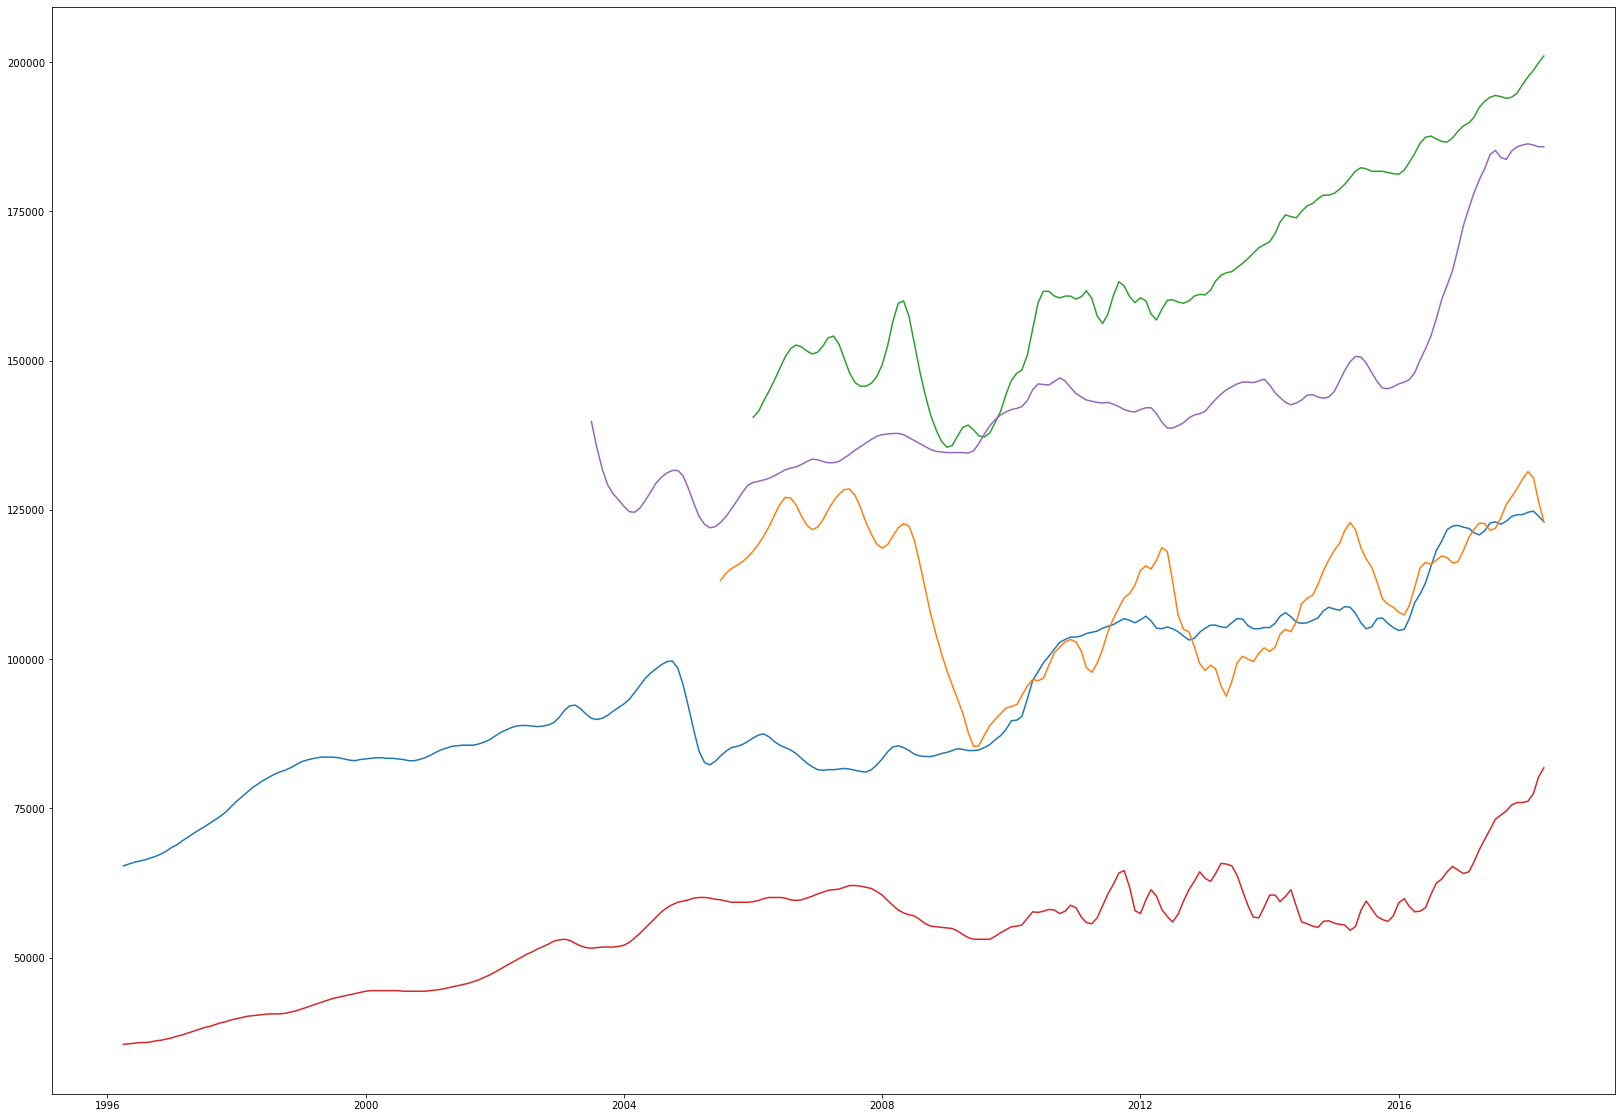

In [242]:
import matplotlib.pyplot as plt
varlist = [a_ts,b_ts,c_ts,d_ts,e_ts]
plt.figure(figsize=(28,20))
ax.legend(["a: Monroe, PA",
"b: Jackson, MS",
"c: Iowa City, IA",
"d: Fort Worth, TX",
"e: Benton City, WA"])

for variable in varlist:
    plt.plot(variable)
    


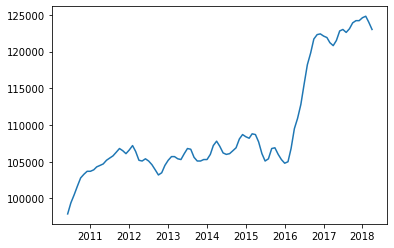

In [35]:
plt.plot(a_ts[170:])

# Testing for Stationarity

### To make our top 5 zipcodes stationary time series, we used differencing

In [244]:
#using the rolling mean for each time series

#varlist = [a_ts,b_ts,c_ts,d_ts,e_ts]
#for variable in varlist:
    #rolmean = variable.rolling(window=6, center=False).mean()
    #rolstd = variable.rolling(window=1, center=False).std()


a_diff = a_ts.diff().dropna()  
b_diff = b_ts.diff().dropna()
c_diff = c_ts.diff().dropna()
d_diff = d_ts.diff().dropna()
e_diff = e_ts.diff().dropna()
    

#for i in range(len(dfs_ts)):
 #rolmean = dfs_ts[i].ret.rolling(window = 12, center = False).mean()
 #rolstd = dfs_ts[i].ret.rolling(window = 12, center = False).std()
 #fig = plt.figure(figsize=(11,5))
 #orig = plt.plot(dfs_ts[i].ret, color=’blue’,label=’Original’)
 #mean = plt.plot(rolmean, color=’red’, label=’Rolling Mean’)
 #std = plt.plot(rolstd, color=’black’, label = ‘Rolling Std’)
 #plt.legend(loc=’best’)
 #plt.title(f’Rolling Mean & Standard Deviation for Zipcode: {dfs_ts[i].RegionName[0]}’)
 #plt.show()





In [245]:
from statsmodels.tsa.stattools import adfuller
#A time series Differencing
result = adfuller(a_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Reject the null hypothesis. Data is Stationary')

ADF Statistic: -3.489009
p-value: 0.008274
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Reject the null hypothesis. Data is Stationary


In [246]:
#B time series differencing 
from statsmodels.tsa.stattools import adfuller
#from index 160
result = adfuller(b_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Reject the Null hypothesis. Data is Stationary')

ADF Statistic: -3.851033
p-value: 0.002426
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578
Reject the Null hypothesis. Data is Stationary


In [247]:
from statsmodels.tsa.stattools import adfuller
#c time series differencing
#from index 160
result = adfuller(c_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Reject the Null Hypothesis. Data is Stationary')

ADF Statistic: -3.813225
p-value: 0.002775
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.578
Reject the Null Hypothesis. Data is Stationary


In [248]:
from statsmodels.tsa.stattools import adfuller
#from index 160
result = adfuller(d_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Fail to Reject the Null. Data is not Stationary')

ADF Statistic: -2.384689
p-value: 0.146104
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Fail to Reject the Null. Data is not Stationary


In [249]:
from statsmodels.tsa.stattools import adfuller
#from index 160
result = adfuller(e_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Fail to Reject the Null. Data is not Stationary')

ADF Statistic: -2.361938
p-value: 0.152769
Critical Values:
	1%: -3.471
	5%: -2.880
	10%: -2.576
Fail to Reject the Null. Data is not Stationary


### We can see that A,B, & C were stationary while D & E are not

# Let's Decompose series D & E to see their trend components


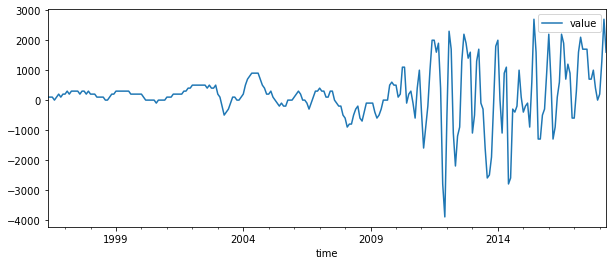

In [42]:
d_diff.plot(figsize=(10, 4));

In [43]:
import numpy as np
#np.log(d_diff).plot(figsize=(10, 4));





In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(d_diff)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

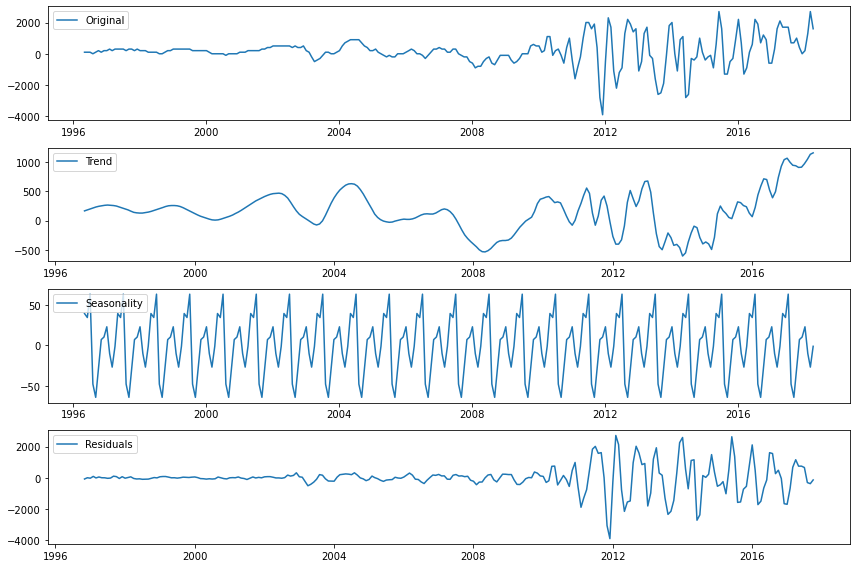

In [45]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(d_diff, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

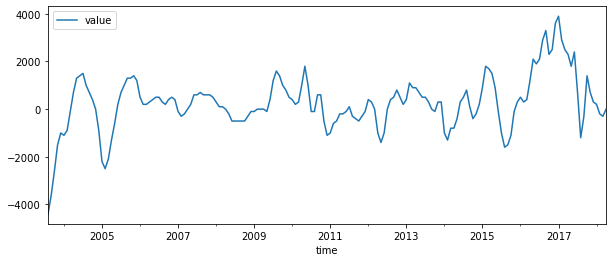

In [46]:
#now let us continue to decomp of e
e_diff.plot(figsize= (10,4));

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(e_diff)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

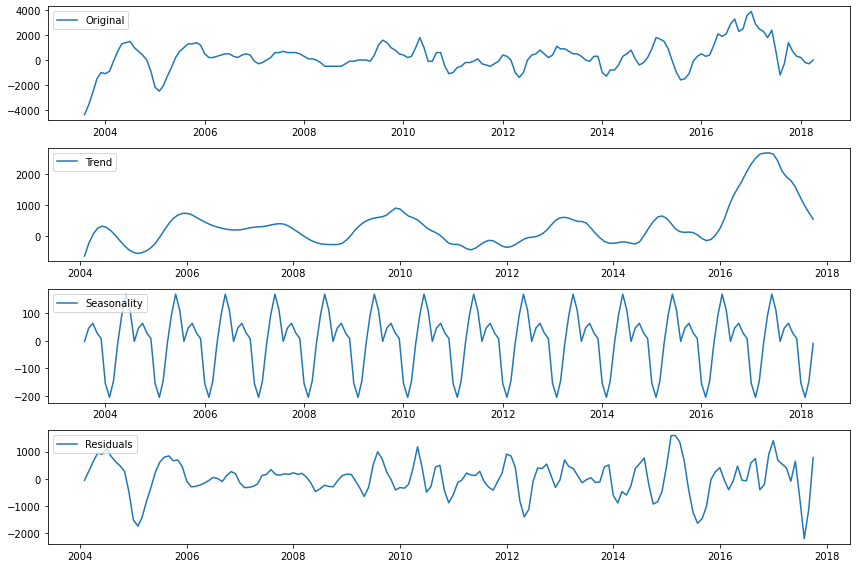

In [48]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(e_diff, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

### We can see that there are strong Seasonal and Trend components within both these timeseries. Both will require SARIMA to account for their non-stationarity

# Step 5: ARIMA Modeling

In [49]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

import itertools

from sklearn.metrics import mean_squared_error

In [50]:
#2016 train test split 2017-2018 test
cutoff = "2016-12-01"
cutoff

'2016-12-01'

In [51]:
#train-test split for all 5 time series
train_a = a_ts['2009':cutoff]
test_a = a_ts[cutoff:]
train_b = b_ts['2009':cutoff]
test_b = b_ts[cutoff:]
train_c = c_ts['2009':cutoff]
test_c = c_ts[cutoff:]
train_d = d_ts['2009':cutoff]
test_d = d_ts[cutoff:]
train_e = e_ts['2009':cutoff]
test_e = e_ts[cutoff:]

# Model A

### Baseline Model: We will be using a naive shift baseline model

In [52]:
# we can perform this with the shift operator
# The prediction for the next day is the original series shifted to the future by one day.
naive_a = train_a.shift(1)
naive_a

,value
time,
2009-01-01,NaN
2009-02-01,84400.0
2009-03-01,84700.0
2009-04-01,85000.0
2009-05-01,84900.0
...,...
2016-08-01,115500.0
2016-09-01,118200.0
2016-10-01,119800.0


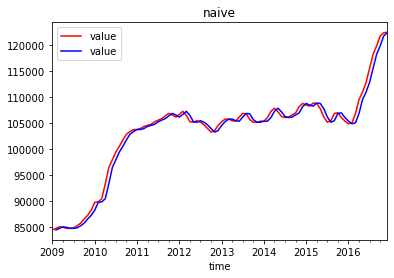

In [53]:
fig, ax = plt.subplots()

train_a[:].plot(ax=ax, c='r', label='original')
naive_a[:].plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

In [54]:
#RMSE of the naive model
np.sqrt(mean_squared_error(train_a[1:], naive_a.dropna()))

994.8287342685252

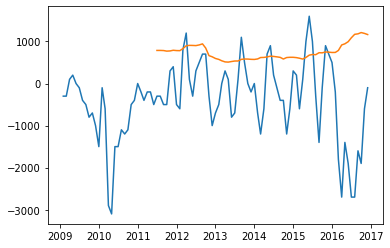

In [55]:
fig, ax = plt.subplots()
residuals = naive_a[1:] - train_a[1:]
ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(30).std());

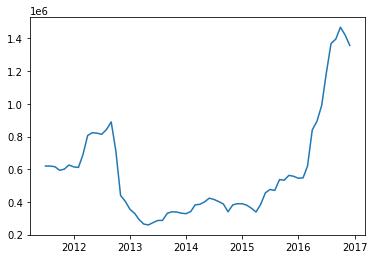

In [56]:
fig, ax = plt.subplots()

ax.plot(residuals.index, residuals.rolling(30).var());

### Exploring ACF and PCF

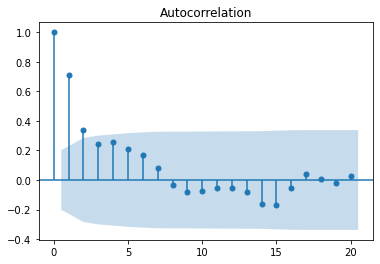

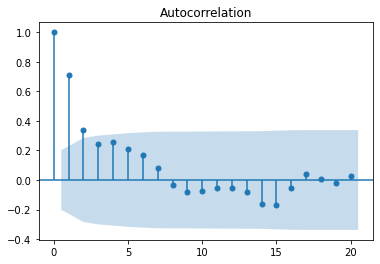

In [57]:
plot_acf(train_a.diff().dropna())

Generally, we use an ACF to predict MA terms.
Moving Average models are using the error terms of the predictions to calculate the next value.  This means that the algorithm does not incorporate the direct effect of the previous value. It models what are sometimes called **impulses** or **shocks** whose effect accounts for the propogation of correlation from one lag to the other. 

This autocorrelation plot can now be used to get an idea of a potential MA term.  Our differenced series shows positive significant correlation at a lag of 1, which suggests adding 1 MA term.

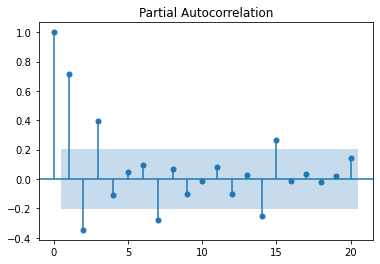

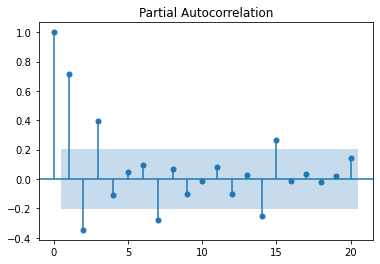

In [58]:
plot_pacf(train_a.diff().dropna())

### First ARIMA model

Since the ACF and the PACF graphs indicate that 1 lag for each will create the optimal model with the lowest AIC and RSME values, let's try it out.

In [59]:
#fitting train into ARIMA model
arima_a = ARIMA(train_a, order=(2, 1, 1)).fit()
y_hat_a = arima_a.predict(btyp='levels')

C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\12676\anaconda3\envs\learn-env\lib

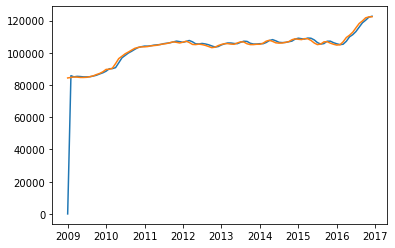

In [60]:
fig, ax = plt.subplots()
ax.plot(y_hat_a)
ax.plot(train_a);

In [61]:
arima_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   96
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -781.507
Date:                Thu, 31 Mar 2022   AIC                           1571.013
Time:                        14:35:36   BIC                           1581.229
Sample:                    01-01-2009   HQIC                          1575.141
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0278      0.004    245.469      0.000       1.020       1.036
ar.L2         -0.0278      0.005     -6.040      0.000      -0.037      -0.019
ma.L1         -0.9999      0.125     -8.010      0.000      -1.245      -0.755
sigma2      7.551e+05   1.53e-07   4.95e+12      0.000    7.55e+05    7.55e+05
===================================================================================
Ljung-Box (L1) (Q):                  46.68   Jarque-Bera (JB):                12.82
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                             0.79
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.07e+28. Standard errors may be unstable.
"""

### Testing

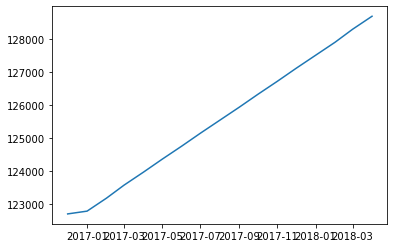

In [62]:
y_hat_test_a = arima_a.predict(start=test_a.index[0], end=test_a.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(y_hat_test_a);

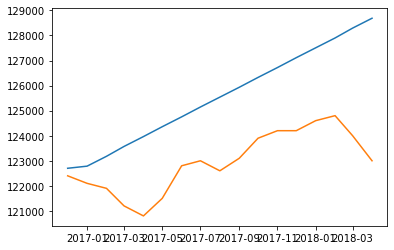

In [63]:
fig, ax = plt.subplots()
ax.plot(y_hat_test_a)
ax.plot(test_a);

In [64]:
np.sqrt(mean_squared_error(test_a, y_hat_test_a))

2875.931651978528

# Step 6: Interpreting Results

Let's also check the RMSE.

In [65]:
#print(f'Random Walk AIC: {.aic}')
print(f'AR(2, 1, 1) AIC: {arima_a.aic}' + "\n")
print(f'Naive Baseline RSME: {np.sqrt(mean_squared_error(train_a[1:], naive_a.dropna()))}')
print(f'AR(2,1,1) Train RSME: {np.sqrt(mean_squared_error(train_a, y_hat_a))}')
print(f'AR(2,1,1) Test RSME: {np.sqrt(mean_squared_error(test_a, y_hat_test_a))}')

AR(2, 1, 1) AIC: 1571.0130595407848

Naive Baseline RSME: 994.8287342685252
AR(2,1,1) Train RSME: 8660.772072232765
AR(2,1,1) Test RSME: 2875.931651978528


In [66]:
forecast_a = arima_a.forecast(steps=36)

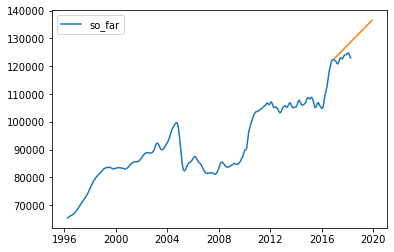

In [67]:
fig, ax = plt.subplots()
ax.plot(a_ts, label='so_far')
ax.plot(forecast_a)

plt.legend();

# Arima Model B

In [68]:
ma_b = ARIMA(train_b, order=(0, 0, 1)).fit()
y_hat_b = ma_b.predict(btyp='levels')

C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


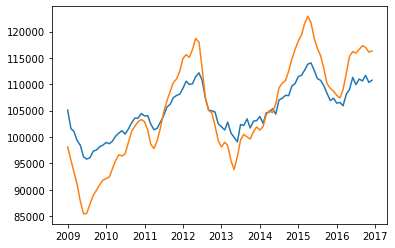

In [69]:
fig, ax = plt.subplots()
ax.plot(y_hat_b)
ax.plot(train_b);

In [70]:
ma_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   96
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -951.970
Date:                Thu, 31 Mar 2022   AIC                           1909.939
Time:                        14:35:42   BIC                           1917.633
Sample:                    01-01-2009   HQIC                          1913.049
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.051e+05    977.623    107.482      0.000    1.03e+05    1.07e+05
ma.L1          1.0000      0.201      4.964      0.000       0.605       1.395
sigma2      2.303e+07   3.03e-05    7.6e+11      0.000     2.3e+07     2.3e+07
===================================================================================
Ljung-Box (L1) (Q):                  90.52   Jarque-Bera (JB):                 3.79
Prob(Q):                              0.00   Prob(JB):                         0.15
Heteroskedasticity (H):               0.89   Skew:                            -0.10
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.3e+30. Standard errors may be unstable.
"""

# B with tuned terms

We will not use the auto correlation function as well as the partial auto correlation fucntion to see which tuned terms will allow us to get the lowest AIC. We will also see how this relates to our RMSE which will be our other metric for our baseline model.

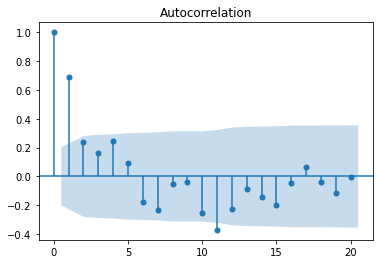

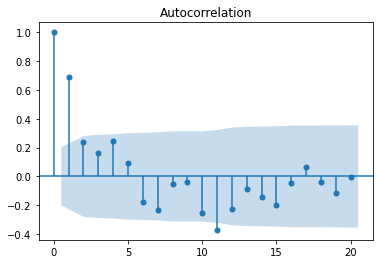

In [71]:
plot_acf(train_b.diff().dropna())

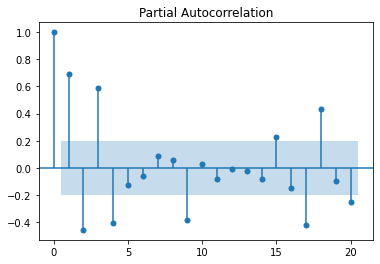

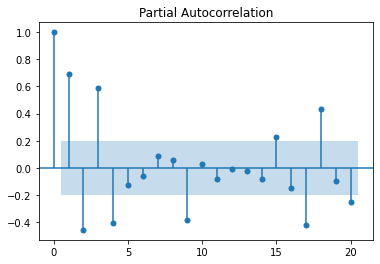

In [72]:
plot_pacf(train_b.diff().dropna())

In [73]:
ma_b1 = ARIMA(train_b, order=(4, 1, 4)).fit()
y_hat_b1 = ma_b.predict(btyp='levels')

C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


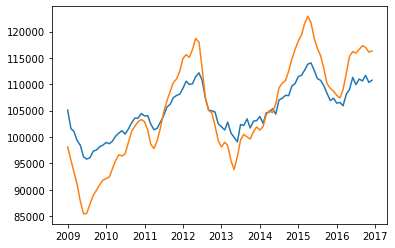

In [74]:
fig, ax = plt.subplots()
ax.plot(y_hat_b1)
ax.plot(train_b);

In [75]:
ma_b1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   96
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -926.107
Date:                Thu, 31 Mar 2022   AIC                           1870.214
Time:                        14:35:46   BIC                           1893.199
Sample:                    01-01-2009   HQIC                          1879.502
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3911      0.127      3.089      0.002       0.143       0.639
ar.L2         -0.5836      0.102     -5.717      0.000      -0.784      -0.384
ar.L3          0.5918      0.088      6.761      0.000       0.420       0.763
ar.L4         -0.6819      0.103     -6.626      0.000      -0.884      -0.480
ma.L1         -0.3449      0.128     -2.700      0.007      -0.595      -0.095
ma.L2          0.5649      0.103      5.483      0.000       0.363       0.767
ma.L3         -0.5929      0.089     -6.676      0.000      -0.767      -0.419
ma.L4          0.6393      0.109      5.880      0.000       0.426       0.852
sigma2      8.108e+05   2.86e+04     28.383      0.000    7.55e+05    8.67e+05
===================================================================================
Ljung-Box (L1) (Q):                  40.95   Jarque-Bera (JB):                 9.95
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.07   Skew:                            -0.78
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Baseline Naive B

In [76]:
naive_b = train_b.shift(1)
naive_b

,value
time,
2009-01-01,NaN
2009-02-01,98100.0
2009-03-01,95600.0
2009-04-01,93400.0
2009-05-01,91000.0
...,...
2016-08-01,115900.0
2016-09-01,116600.0
2016-10-01,117300.0


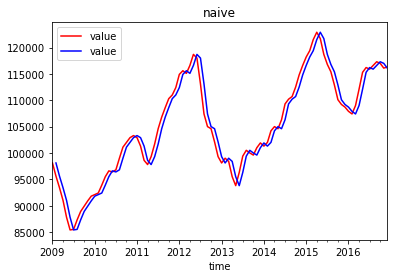

In [77]:
fig, ax = plt.subplots()

train_b[:].plot(ax=ax, c='r', label='original')
naive_b[:].plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

In [78]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(train_b[1:], naive_b.dropna()))

1844.0801443937758

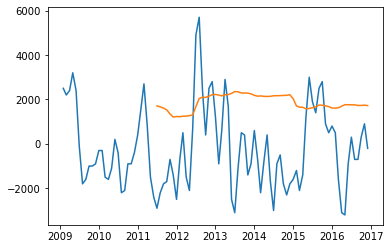

In [79]:
fig, ax = plt.subplots()
residuals = naive_b[1:] - train_b[1:]
ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(30).std());

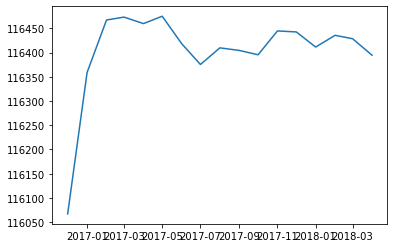

In [80]:
y_hat_test_b = ma_b1.predict(start=test_b.index[0], end=test_b.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(y_hat_test_b);

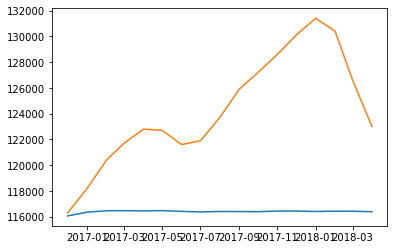

In [81]:
fig, ax = plt.subplots()
ax.plot(y_hat_test_b)
ax.plot(test_b);

In [82]:
print(f'Naive Baseline RSME: {np.sqrt(mean_squared_error(train_b[1:], naive_b.dropna()))}')
print(f'AR(4,1,4) Train RSME: {np.sqrt(mean_squared_error(train_b, y_hat_b))}')
print(f'AR(4,1,4) Test RSME: {np.sqrt(mean_squared_error(test_b, y_hat_test_b))}')

Naive Baseline RSME: 1844.0801443937758
AR(4,1,4) Train RSME: 4974.94202117918
AR(4,1,4) Test RSME: 8890.233746576021


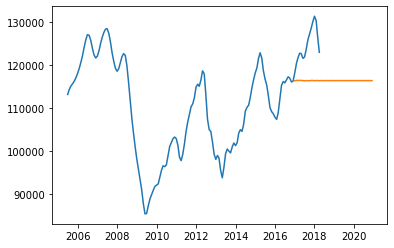

In [83]:
forecast_b = ma_b1.forecast(steps=48)

fig, ax = plt.subplots()
ax.plot(b_ts)
ax.plot(forecast_b);

# Model C

## Baseline Model: Naive Shift C
 Let's look at zipcode Model C: Iowa City, Iowa. 

In [107]:
naive_c = train_c.shift(1)
naive_c

,value
time,
2009-01-01,NaN
2009-02-01,135500.0
2009-03-01,135800.0
2009-04-01,137300.0
2009-05-01,138800.0
...,...
2016-08-01,187600.0
2016-09-01,187100.0
2016-10-01,186700.0


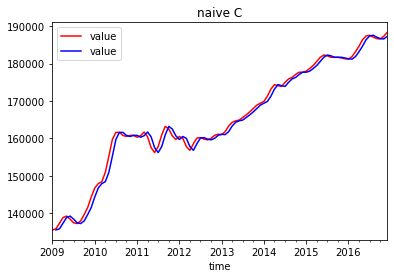

In [108]:
fig, ax = plt.subplots()

train_c[:].plot(ax=ax, c='r', label='original')
naive_c[:].plot(ax=ax, c='b', label='shifted')
ax.set_title('naive C')
ax.legend();

In [126]:
#RMSE of the naive model
np.sqrt(mean_squared_error(train_c[1:], naive_c.dropna()))

1296.8382604180872

We can see that the MSE value of the naive shift model is 1296

### We will first plot the PACF and ACF to determine our AR and MA terms

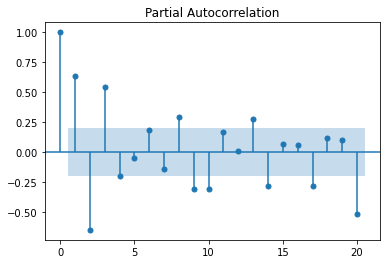

In [141]:
plot_pacf(train_c.diff().dropna());


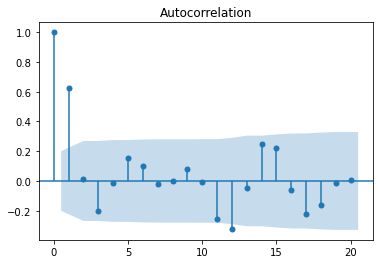

In [85]:
plot_acf(train_c.diff().dropna());

### We can see that there are significant terms for AR values 1,2,3 and MA values 1. After examining the AIC terms for these configurations, we used a ARIMA Model of (2,0,1) to train our model

In [156]:
ar_3 = ARIMA(train_c, order=(2,0,1)).fit()

C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


BASELINE
OPTIMAL
MSE ERROR: np.sqrt

In [157]:
ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   96
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -773.146
Date:                Thu, 31 Mar 2022   AIC                           1556.292
Time:                        15:14:18   BIC                           1569.113
Sample:                    01-01-2009   HQIC                          1561.474
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.652e+05   2.89e+04      5.707      0.000    1.08e+05    2.22e+05
ar.L1          1.5368      0.083     18.593      0.000       1.375       1.699
ar.L2         -0.5400      0.081     -6.693      0.000      -0.698      -0.382
ma.L1          0.6945      0.079      8.780      0.000       0.539       0.850
sigma2      5.299e+05   6.57e+04      8.060      0.000    4.01e+05    6.59e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.39   Jarque-Bera (JB):                 9.56
Prob(Q):                              0.24   Prob(JB):                         0.01
Heteroskedasticity (H):               0.19   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [158]:
y_hat_c = ar_3.predict(btyp='levels')

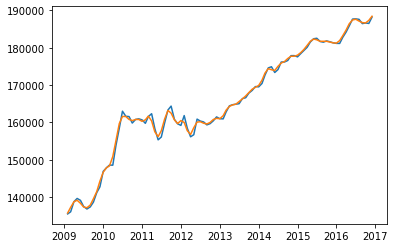

In [159]:
fig, ax = plt.subplots()
ax.plot(y_hat_c[1:])
ax.plot(train_c[1:])

In [160]:
np.sqrt(mean_squared_error(train_c, y_hat_c.dropna()))

3113.11956150866

## We can see in the above graph how the ARIMA model fits with the training set of data. Below we will analyze how the model predicts on the testing set

In [161]:
y_hat_test_c = ar_3.predict(start=test_c.index[0], end=test_c.index[-1],typ='levels')

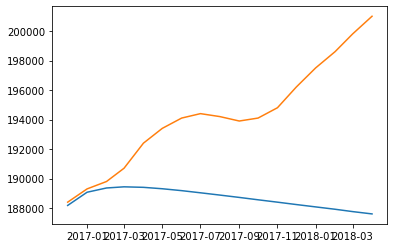

In [170]:
fig, ax = plt.subplots()
ax.plot(y_hat_test_c);
ax.plot(test_c)
ax.plot(y_hat_c[1:])
ax.plot(train_c[1:])

In [168]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_c,y_hat_test_c))

6850.421141100081

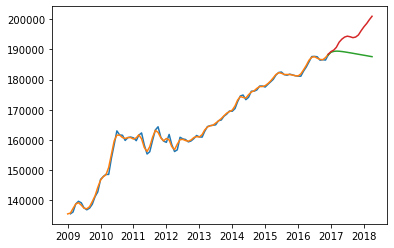

In [208]:
fig,ax = plt.subplots()
ax.plot(y_hat_c[1:])
ax.plot(train_c)
ax.plot(y_hat_test_c);
ax.plot(test_c)

## We can see from the above graph that even though the ARIMA model fits the training set well, it does not make good predictions on the test data with an AIC of 6850

## We will move on to a SARIMA model which takes seasonality into account

In [172]:
p = q = range(0, 2)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter for SARIMA...')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))

Examples of parameter for SARIMA...
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 1, 0, 12)
SARIMAX: (0, 1, 0) x (1, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (1, 1, 0, 12)
SARIMAX: (0, 1, 1) x (1, 1, 1, 12)
SARIMAX: (1, 1, 0) x (0, 1, 0, 12)
SARIMAX: (1, 1, 0) x (0, 1, 1, 12)
SARIMAX: (1, 1, 0) x (1, 1, 0, 12)
SARIMAX: (1, 1, 0) x (1, 1, 1, 12)
SARIMAX: (1, 1, 1) x (0, 1, 0, 12)
SARIMAX: (1, 1, 1) x (0, 1, 1, 12)
SARIMAX: (1, 1, 1) x (1, 1, 0, 12)
SARIMAX: (1, 1, 1) x (1, 1, 1, 12)


In [173]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=SARIMAX(train_c,
                         order=param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('Oops!')
            continue

C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1479.1976269594634
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1236.2702049303073
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1238.0949694745725


C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1223.3580924815424
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1436.9145011200874


C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1159.4711084917317


C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1219.3725884315463


C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1161.4568705474974
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1448.2938456931208


C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1217.8177471048082


C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:1191.154888074953


C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:1189.8859799020463
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1457.7854824789215


C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:1149.5741879378093


C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:1193.209494479323


C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1156.3232504590499


# We can see that the best SARIMA values are ARIMA(1, 1, 1)x(1, 1, 1, 12) - with an AIC of 1156.3232504590499

Let's see how the SARIMA model does making predictions of the test set

In [210]:
sari_mod_c = SARIMAX(train_c,
                  order=(1, 1, 1),
                  seasonal_order=(1, 1, 1, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [211]:
sari_test_c = sari_mod_c.predict(start=test_c.index[0], end=test_c.index[-1],typ='levels')

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_c,sari_test_c))

765.5374189141199

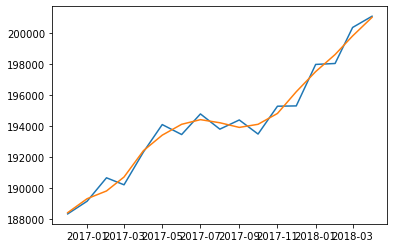

In [201]:
fig, ax = plt.subplots()
ax.plot(sari_test_c);
ax.plot(test_c)

## The SARIMA model clearly performed much better than the simple ARIMA with an RMSE of ~765. This also has a much better RMSE than the baseline model of 1296. We will now train the SARIMA model on the entire C timeseries and use it to forecast into the future beyond our dataset

In [236]:
sari_mod_c_ts = SARIMAX(c_ts,
                  order=(1, 1, 1),
                  seasonal_order=(1, 1, 1, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\12676\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


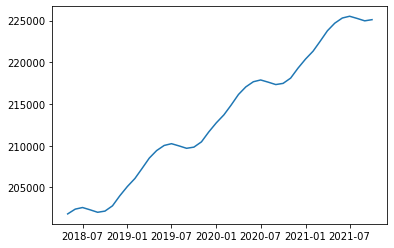

In [237]:
forecast_c = sari_mod_c_ts.forecast(steps=42)

fig, ax = plt.subplots()
ax.plot(forecast_c);

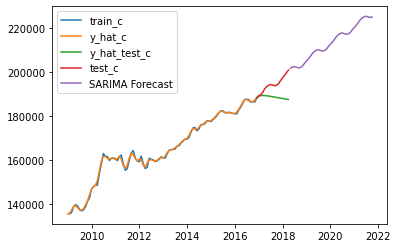

In [235]:
fig,ax = plt.subplots()
#ax.plot(c_ts)
ax.plot(y_hat_c[1:])
ax.plot(train_c)
ax.plot(y_hat_test_c)
ax.plot(test_c)
ax.plot(forecast_c)
ax.legend(["train_c","y_hat_c","y_hat_test_c","test_c","SARIMA Forecast"])

# Model D

### Baseline Model

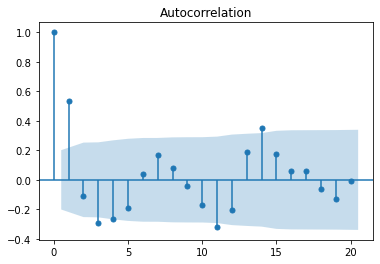

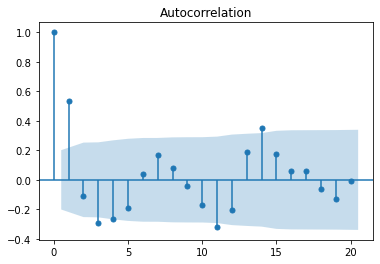

In [224]:
plot_acf(train_d.diff().dropna())

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


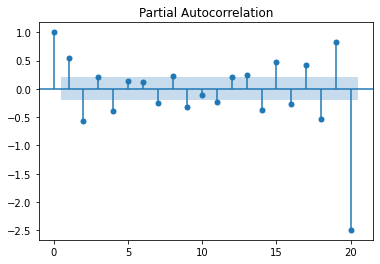

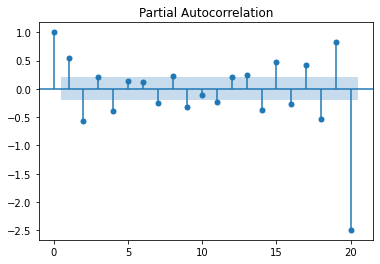

In [225]:
plot_pacf(train_d.diff().dropna())

In [226]:
p = q = range(0, 2)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter for SARIMA...')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))

Examples of parameter for SARIMA...
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 1, 0, 12)
SARIMAX: (0, 1, 0) x (1, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (1, 1, 0, 12)
SARIMAX: (0, 1, 1) x (1, 1, 1, 12)
SARIMAX: (1, 1, 0) x (0, 1, 0, 12)
SARIMAX: (1, 1, 0) x (0, 1, 1, 12)
SARIMAX: (1, 1, 0) x (1, 1, 0, 12)
SARIMAX: (1, 1, 0) x (1, 1, 1, 12)
SARIMAX: (1, 1, 1) x (0, 1, 0, 12)
SARIMAX: (1, 1, 1) x (0, 1, 1, 12)
SARIMAX: (1, 1, 1) x (1, 1, 0, 12)
SARIMAX: (1, 1, 1) x (1, 1, 1, 12)


In [227]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=SARIMAX(train_d,
                         order=param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('Oops!')
            continue

ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1493.2409411355009
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1267.5412413361262
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1281.161081898726


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-package

ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1264.9117048186301
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1448.0534754858206
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1212.554192947418
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1256.3910934833943


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-package

ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1209.2929831647443
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1472.6844763041745
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1250.5356944454113
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:1239.8105813767158


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-package

ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:1244.021298548767
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1444.233133581279


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:1207.3598369137026
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:1232.9782290992955


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1209.787299397421


ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:1207.3598369137026

In [230]:
sari_mod_d =SARIMAX(d_ts,
                  order=(1, 1, 1),
                  seasonal_order=(1, 1, 1, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [231]:
forecast_d = sari_mod_d.forecast(steps=36)

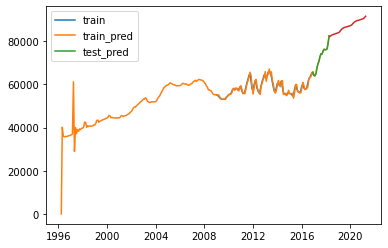

In [237]:
y_hat_train_d = sari_mod_d.predict(typ='levels')
y_hat_test_d = sari_mod_d.predict(start=test_d.index[0], end=test_d.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(train_d, label='train')
ax.plot(y_hat_train_d, label='train_pred')
ax.plot(y_hat_test_d, label='test_pred')
ax.plot(forecast_d)

plt.legend();

In [238]:
forecast_d

2018-05-01    82239.374136
2018-06-01    82590.473828
2018-07-01    82926.132778
2018-08-01    83078.180890
2018-09-01    83214.672141
2018-10-01    83412.944620
2018-11-01    83580.689077
2018-12-01    83714.346758
2019-01-01    83891.332743
2019-02-01    84179.285299
2019-03-01    84754.581695
2019-04-01    85357.727721
2019-05-01    85780.498250
2019-06-01    86079.682597
2019-07-01    86350.589194
2019-08-01    86476.559892
2019-09-01    86584.296320
2019-10-01    86740.426570
2019-11-01    86896.010874
2019-12-01    87036.844618
2020-01-01    87212.635772
2020-02-01    87446.809772
2020-03-01    87909.183884
2020-04-01    88459.349466
2020-05-01    88881.238196
2020-06-01    89177.663539
2020-07-01    89445.128693
2020-08-01    89569.713434
2020-09-01    89675.921577
2020-10-01    89829.812000
2020-11-01    89984.750003
2020-12-01    90125.965150
2021-01-01    90301.692800
2021-02-01    90533.008505
2021-03-01    90989.380868
2021-04-01    91536.730574
Freq: MS, Name: predicted_me

In [239]:
np.sqrt(mean_squared_error(train_d, y_hat_train_d))

ValueError: Found input variables with inconsistent numbers of samples: [96, 265]

In [240]:
np.sqrt(mean_squared_error(test_d, y_hat_test_d))

627.8583972263732

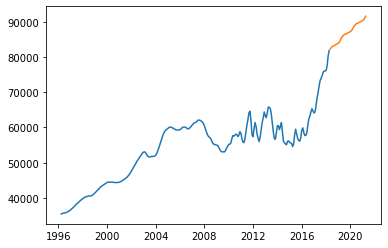

In [244]:
fig, ax = plt.subplots()
ax.plot(d_ts, label='test_pred')
ax.plot(forecast_d)

# SARIMA Model for Region E

In [196]:
#Train Test Split
train_e = e_ts['2009':cutoff]
test_e = e_ts[cutoff:]

In [197]:
p = q = range(0, 2)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter for SARIMA...')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))

Examples of parameter for SARIMA...
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 1, 0, 12)
SARIMAX: (0, 1, 0) x (1, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (1, 1, 0, 12)
SARIMAX: (0, 1, 1) x (1, 1, 1, 12)
SARIMAX: (1, 1, 0) x (0, 1, 0, 12)
SARIMAX: (1, 1, 0) x (0, 1, 1, 12)
SARIMAX: (1, 1, 0) x (1, 1, 0, 12)
SARIMAX: (1, 1, 0) x (1, 1, 1, 12)
SARIMAX: (1, 1, 1) x (0, 1, 0, 12)
SARIMAX: (1, 1, 1) x (0, 1, 1, 12)
SARIMAX: (1, 1, 1) x (1, 1, 0, 12)
SARIMAX: (1, 1, 1) x (1, 1, 1, 12)


In [198]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=SARIMAX(train_e,
                         order=param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('Oops!')
            continue

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-package

ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1438.7938029076356
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1222.5094261905615
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1224.7696926950741
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1210.2182861081992


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1388.744411998519
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1138.6242478636798


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1186.359416093496
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1152.481694834514


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-package

ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1333.7120861223962
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1126.2334881428228
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:1103.996705900615


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:1104.7330463130982
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1311.4759606324508


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:1083.1830217879876
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:1105.7694593269991


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1083.8138941389223


In [228]:
sari_mod_e =SARIMAX(train_e,
                  order=(1, 1, 1),
                  seasonal_order=(1, 1, 1, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


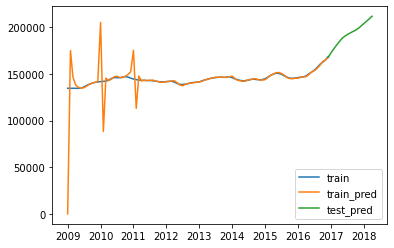

In [229]:
y_hat_train = sari_mod_e.predict(typ='levels')
y_hat_test = sari_mod_e.predict(start=test_e.index[0], end=test_e.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(train_e, label='train')
#ax.plot(test_e, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')

plt.legend();

In [201]:
np.sqrt(mean_squared_error(test_e, y_hat_test))

12964.759165482004

In [242]:
forecast_e = sari_mod_e.forecast(steps=36)

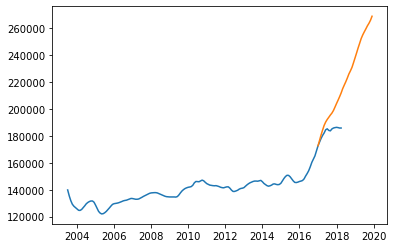

In [243]:
fig, ax = plt.subplots()
ax.plot(e_ts, label='test_pred')
ax.plot(forecast_e)

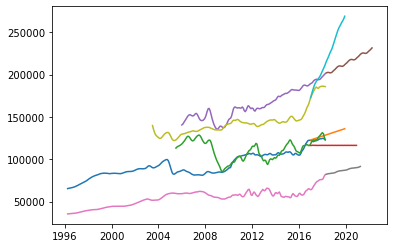

In [245]:
fig, ax = plt.subplots()
ax.plot(a_ts, label='test_pred')
ax.plot(forecast_a)
ax.plot(b_ts, label='test_pred')
ax.plot(forecast_b)
ax.plot(c_ts, label='test_pred')
ax.plot(forecast_c)
ax.plot(d_ts, label='test_pred')
ax.plot(forecast_d)
ax.plot(e_ts, label='test_pred')
ax.plot(forecast_e)